# Skin cancer classification
-Goal: distinguish between melanoma (0), nevus (1) and seborrheic keratosis (2)

The original task "Lesion Classfication" and the full data (2000 images for training)  is obtained from the [ISIC 2017 Challenge](https://challenge.isic-archive.com/landing/2017/44). 


# Download custom data

The custom data contains 125 images for training, 45 images for validation and 45 images for testing.

In [ ]:
!wget "https://onedrive.live.com/download?cid=A86CBC7F31A1C06B&resid=A86CBC7F31A1C06B%21463&authkey=ALKaMucuFKe-LPs" -O custom_skin_cancer.tar

--2022-10-09 13:41:03--  https://onedrive.live.com/download?cid=A86CBC7F31A1C06B&resid=A86CBC7F31A1C06B%21463&authkey=ALKaMucuFKe-LPs
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://3d96pw.db.files.1drv.com/y4mROabH8BXRX_3ODs7Q7Nxd-B-4qc16lc4tf6n6bi8-ojvbirY4wM1YficYa9JFRmGvghdj4QUGZx2Pe8di_MZkjDIbXO6NRgw8MoGC8aFNFTIhwr_tN464MgNSLSCp2zdO6b8NhZF0d6g0cvaoWGzhAhw8vqAKmyciFqh-6nFw8z2Jg2ZWpjxlvxlmg9_5SmuRJ0g45FFTjpKkEbcZTXpFw/custom_skin_cancer.tar?download&psid=1 [following]
--2022-10-09 13:41:04--  https://3d96pw.db.files.1drv.com/y4mROabH8BXRX_3ODs7Q7Nxd-B-4qc16lc4tf6n6bi8-ojvbirY4wM1YficYa9JFRmGvghdj4QUGZx2Pe8di_MZkjDIbXO6NRgw8MoGC8aFNFTIhwr_tN464MgNSLSCp2zdO6b8NhZF0d6g0cvaoWGzhAhw8vqAKmyciFqh-6nFw8z2Jg2ZWpjxlvxlmg9_5SmuRJ0g45FFTjpKkEbcZTXpFw/custom_skin_cancer.tar?download&psid=1
Resolving 3d96pw.db.files.1drv.com (3d96p

In [ ]:
# unzip data
!tar -xvf custom_skin_cancer.tar

# remove tar file
!rm -rf custom_skin_cancer.tar

./custom_skin_cancer/
./custom_skin_cancer/train/
./custom_skin_cancer/train/melanoma/
./custom_skin_cancer/train/melanoma/ISIC_0001152.jpg
./custom_skin_cancer/train/melanoma/ISIC_0000466.jpg
./custom_skin_cancer/train/melanoma/ISIC_0014108.jpg
./custom_skin_cancer/train/melanoma/ISIC_0013618.jpg
./custom_skin_cancer/train/melanoma/ISIC_0010225.jpg
./custom_skin_cancer/train/melanoma/ISIC_0013499.jpg
./custom_skin_cancer/train/melanoma/ISIC_0000163.jpg
./custom_skin_cancer/train/melanoma/ISIC_0000302.jpg
./custom_skin_cancer/train/melanoma/ISIC_0013997.jpg
./custom_skin_cancer/train/melanoma/ISIC_0011166.jpg
./custom_skin_cancer/train/melanoma/ISIC_0012208.jpg
./custom_skin_cancer/train/melanoma/ISIC_0014983.jpg
./custom_skin_cancer/train/melanoma/ISIC_0000078.jpg
./custom_skin_cancer/train/melanoma/ISIC_0010011.jpg
./custom_skin_cancer/train/melanoma/ISIC_0000300.jpg
./custom_skin_cancer/train/melanoma/ISIC_0015284.jpg
./custom_skin_cancer/train/melanoma/ISIC_0000167.jpg
./custom_ski

# Training data visualization

In [ ]:
from tensorflow.python import train
import glob
import os

## extract class categories from folders' name. In each training and validation folder, there are 3 subfolders corresponding to 3 classes.
## The names of the subfolders are extracted and used as the true labels of the images

# extract all path of training folder
train_img_paths = glob.glob("./custom_skin_cancer/train/*/*")
# extract the titles from path
titles = []
for path in train_img_paths:
  title = os.path.dirname(path). split('/')[-1]
  titles.append(title)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=10,
            width_shift_range=0.2,
            height_shift_range= 0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            brightness_range=[0.2,1.2],      
            )

In [ ]:
# Training data: read images from training folder with batch size = 32
directory_train = "./custom_skin_cancer/train"
train_generator_df = datagen.flow_from_directory(
                      directory_train,
                      target_size=(256,256),
                      color_mode='rgb',
                      class_mode='categorical',
                      batch_size=32,
                      shuffle=False,
                      seed=221006, # Today, Thursday 06th Oct 2022
                      save_to_dir=None, # TODO
                      save_prefix='',
                      save_format='png',
                      follow_links=False, #TODO read documentation
                      subset=None, #TOODO read documentation
)

Found 125 images belonging to 3 classes.


In [ ]:
# see the index of each class
print(train_generator_df.class_indices)

{'melanoma': 0, 'nevus': 1, 'seborrheic_keratosis': 2}


In [ ]:
# Validation data: read images from validation folder with batch size = 32
directory_valid = './custom_skin_cancer/valid'
valid_generator_df = datagen.flow_from_directory(
                      directory_valid,
                      target_size=(256,256),
                      color_mode='rgb',
                      class_mode='categorical',
                      batch_size=32,
                      shuffle=False,
                      seed=221006, # Today, Thursday 06th Oct 2022
                      save_to_dir=None, # TODO
                      save_prefix='',
                      save_format='png',
                      follow_links=False, #TODO read documentation
                      subset=None, #TOODO read documentation
)

Found 45 images belonging to 3 classes.


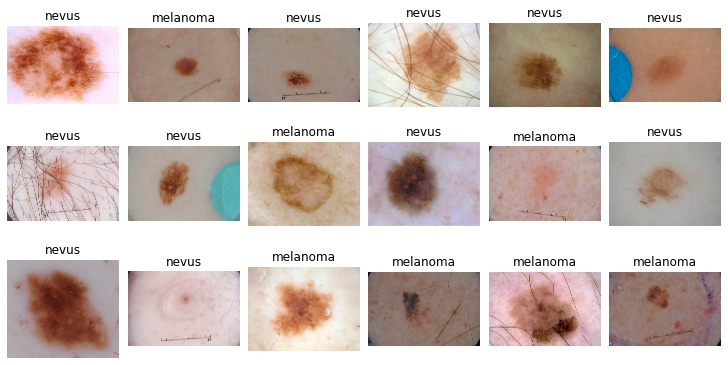

In [ ]:
# create a figure to show 18 random images and their labels
fig, axes = plt.subplots(nrows=3, ncols=6, constrained_layout=True, figsize=(10,5))

for ax in axes.flat:
  random_indx = np.random.randint(0, len(train_img_paths))
  img = plt.imread(train_img_paths[random_indx])
  ax.imshow(img)
  ax.set_title(titles[random_indx])
  ax.axis("off")

# Create model , handle over fitting and train

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2

In [ ]:
# use MobileNetV2 as the base, do not include the fully-connected layer at the top of the network 
from tensorflow.keras.applications import MobileNetV2
base_mobilenet = MobileNetV2(weights='imagenet', input_shape=(256,256,3), include_top=False)
# include_top: whether to include the fully-connected layer at the top of the network

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
# training model consists of 1 input layer, the base MobilenetV2, 1 Max Pooling layer, 
# 4 fully connected layers (1 FC uses regularizer L2),1 dropout layer,  1 output layer

def create_model(factor1,rate):
      model = Sequential([
        keras.Input(shape=(256,256,3)),
        base_mobilenet,
        keras.layers.GlobalMaxPooling2D(),
        keras.layers.Dense(512, kernel_regularizer=l2(factor1), activation="relu"), # layer using regularizer L2 to overcome overfitting
        Dropout(rate), # Dropout layer to overcome overfitting
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(3, activation="softmax") 
        ])
      return model

In [ ]:
# freeze base_mobilenet (freeze model/layer used in Transfer learning) to handle overfitting
base_mobilenet.trainable = False

In [ ]:
# create check point for model at the maximul validation categorical accuracy
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                  filepath = "./skin_cancer_model/checkpoint",
                                  save_weights_only=True,
                                  monitor="val_categorical_accuracy",
                                  mode="max",
                                  save_best_only=True,
                                  verbose=1
)

# early stopping if the validation loss does not decrease in 40 epochs
model_earlystopping_callback = tf.keras.callbacks.EarlyStopping(
                                                monitor="val_loss",
                                                min_delta=0,
                                                patience=40,
                                                verbose=0,
                                                mode="min",
                                                baseline=None, #TODO
                                                restore_best_weights=False,
)

In [ ]:
# create the model with L2 regularizer factor 10^-7 and Dropout rate 0.1
model = create_model(1e-7, 0.1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 global_max_pooling2d (Globa  (None, 1280)             0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               3

In [ ]:
model.compile(
        loss = keras.losses.categorical_crossentropy,
        optimizer = tf.keras.optimizers.Adam(
                          learning_rate=1e-3,
                          beta_1=0.9,
                          beta_2=0.999,
                          epsilon=1e-07,
                          amsgrad=False,
                          name='Adam'
        ) ,
        metrics = keras.metrics.categorical_accuracy
)

In [ ]:
# fit model
history = model.fit(
              train_generator_df,
              epochs = 100,
              validation_data = valid_generator_df,
              callbacks= [model_checkpoint_callback,
                         model_earlystopping_callback]
)

KeyboardInterrupt: ignored

# Use model to predict test data
## Load weights from a pretrained model
The model was already trained and its weights are saved. Now, the weights are loaded from that pretrained model.

In [ ]:
# clean duplicated files if exists
!rm -rf skin_cancer_*

# download trained weights
!wget "https://onedrive.live.com/download?cid=A86CBC7F31A1C06B&resid=A86CBC7F31A1C06B%21465&authkey=ALJ2LuvDzI2C50Q" -O skin_cancer_model.tar

# unzip model
!tar -xvf skin_cancer_model.tar

--2022-10-09 13:45:26--  https://onedrive.live.com/download?cid=A86CBC7F31A1C06B&resid=A86CBC7F31A1C06B%21465&authkey=ALJ2LuvDzI2C50Q
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://3dpwka.db.files.1drv.com/y4mS47Ln-pUMFG0mSNZU5EzIpAq-9Ml1qkyWH5AN4Dfjgz3GQx2Wph9HQz7aE10bMyb-s2iwfcS6v-nxNC7iScJjMJYpeXZmqM6NywfBCfzjayjO6x5afunXNZEfX_wp2lEm86NT8AYC9Tv-RKwdQoAh6fhhglub7KSrHyYs3VygHvLu2xos9ohsxsgc2ZdUdvzlO-on24fvRuKwbd0vNaGSg/skin_cancer_model.tar?download&psid=1 [following]
--2022-10-09 13:45:27--  https://3dpwka.db.files.1drv.com/y4mS47Ln-pUMFG0mSNZU5EzIpAq-9Ml1qkyWH5AN4Dfjgz3GQx2Wph9HQz7aE10bMyb-s2iwfcS6v-nxNC7iScJjMJYpeXZmqM6NywfBCfzjayjO6x5afunXNZEfX_wp2lEm86NT8AYC9Tv-RKwdQoAh6fhhglub7KSrHyYs3VygHvLu2xos9ohsxsgc2ZdUdvzlO-on24fvRuKwbd0vNaGSg/skin_cancer_model.tar?download&psid=1
Resolving 3dpwka.db.files.1drv.com (3dpwka.

## Download test data

In [ ]:
!wget "https://onedrive.live.com/download?cid=A86CBC7F31A1C06B&resid=A86CBC7F31A1C06B%21466&authkey=AJK-sjRVtBu4UDU" -O test.tar

# unzip test data folder
!tar -xvf test.tar

--2022-10-09 13:45:30--  https://onedrive.live.com/download?cid=A86CBC7F31A1C06B&resid=A86CBC7F31A1C06B%21466&authkey=AJK-sjRVtBu4UDU
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://3d9lbq.db.files.1drv.com/y4m4JjegIm3XS6zs5hi3kpEpIvAUI2I1DdyUPSlA7bt1wODy8VdPpqhIP8LNV1FeB8dB7kKissHT9g0asIcLiE3wfMfokQseDVQaoQ2EP1YYi-K8b1Va8JobyMWfUb8D-GZ6HXsa27bSnLzkTSvSFTV2C84TcBsm0uiyQxjMOoXJNvB4Tne5M2TG-jszX2kDLCIuko3JSqL9e9UYbG7puGz4Q/test.tar?download&psid=1 [following]
--2022-10-09 13:45:31--  https://3d9lbq.db.files.1drv.com/y4m4JjegIm3XS6zs5hi3kpEpIvAUI2I1DdyUPSlA7bt1wODy8VdPpqhIP8LNV1FeB8dB7kKissHT9g0asIcLiE3wfMfokQseDVQaoQ2EP1YYi-K8b1Va8JobyMWfUb8D-GZ6HXsa27bSnLzkTSvSFTV2C84TcBsm0uiyQxjMOoXJNvB4Tne5M2TG-jszX2kDLCIuko3JSqL9e9UYbG7puGz4Q/test.tar?download&psid=1
Resolving 3d9lbq.db.files.1drv.com (3d9lbq.db.files.1drv.com)... 13.1

## Apply the pretrained weights on new model

In [ ]:
# create new model
new_model = create_model(0,0)

# pass pretrained weight checkpoint to new model
new_model.load_weights("./skin_cancer_model/checkpoint")

# compile new model
new_model.compile(
        loss=keras.losses.categorical_crossentropy,
        metrics=keras.metrics.categorical_accuracy
        )

In [ ]:
tf.train.load_checkpoint("./skin_cancer_model/checkpoint")

In [ ]:
# ImageDataGenerator for test data augmentation
test_datagen = ImageDataGenerator(
                  rescale=1./255
                  )

test_directory = "./test"
test_generator_df = test_datagen.flow_from_directory(
                        test_directory,
                        target_size=(256,256),
                        color_mode='rgb',
                        class_mode='categorical',
                        shuffle=None,
                        )

Found 45 images belonging to 3 classes.


In [ ]:
# evaluate new model on test data
new_model.evaluate(test_generator_df)

## TODO tai sao vua evaluate vua predict tren test_generator_df

2/2 [==============================] - 6s 2s/step - loss: 0.4630 - categorical_accuracy: 0.8222


[0.463013231754303, 0.8222222328186035]

In [ ]:
new_model.evaluate(valid_generator_df)

2/2 [==============================] - 6s 2s/step - loss: 0.4525 - categorical_accuracy: 0.8222


[0.45254525542259216, 0.8222222328186035]

# Use confusion matrix to visualize the result

In [ ]:
new_model.evaluate(train_generator_df)

4/4 [==============================] - 18s 4s/step - loss: 0.5004 - categorical_accuracy: 0.7920


[0.5003518462181091, 0.7919999957084656]

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
#  predict on test data
test_one_hot_pred = new_model.predict(test_generator_df)

In [ ]:
test_one_hot_pred

array([[0.6188633 , 0.3781788 , 0.00295797],
       [0.62693363, 0.3676183 , 0.00544813],
       [0.7031331 , 0.28653476, 0.01033207],
       [0.85415715, 0.1291432 , 0.01669962],
       [0.73022723, 0.2671364 , 0.00263642],
       [0.72814924, 0.24079531, 0.03105546],
       [0.7424829 , 0.24493013, 0.01258705],
       [0.65755695, 0.29360476, 0.04883823],
       [0.8038753 , 0.11648976, 0.0796349 ],
       [0.6889759 , 0.07626769, 0.23475648],
       [0.61002433, 0.38734725, 0.00262841],
       [0.0441764 , 0.9500624 , 0.0057612 ],
       [0.2759225 , 0.69472075, 0.02935666],
       [0.7189876 , 0.27568725, 0.00532513],
       [0.16126165, 0.83245903, 0.00627926],
       [0.03128492, 0.95402473, 0.0146903 ],
       [0.5869597 , 0.40552863, 0.00751157],
       [0.5494749 , 0.42325133, 0.02727383],
       [0.39271402, 0.48512748, 0.12215851],
       [0.29724824, 0.69461316, 0.00813864],
       [0.08557581, 0.5664017 , 0.34802243],
       [0.01595575, 0.84685355, 0.13719065],
       [0.

In [ ]:
# predicted classes for test data, one-hot-encoding
y_pred = np.array([np.argmax(x) for x in test_one_hot_pred], dtype=np.int8)

# true classes of test data
y_true = np.array(test_generator_df.classes, dtype=np.int32)

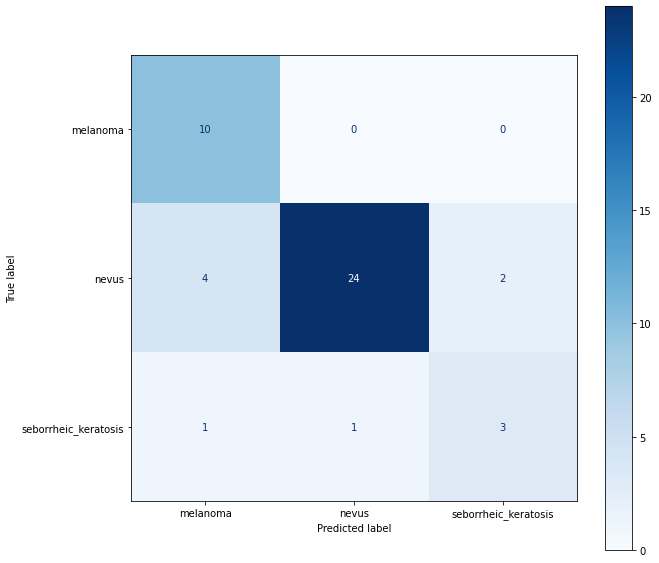

<Figure size 432x288 with 0 Axes>

In [ ]:
# labels of classes for displaying confusion matrix
labels = list(test_generator_df.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot(cmap=plt.cm.Blues)

fig = disp.ax_.get_figure()
fig.set_figwidth(10)
fig.set_figheight(10)
plt.show()
plt.savefig("test_result_confusionmatrix.png", dpi=300)

The malignant melanoma are all predicted as melanoma. This is a good sign!

# Visualize the prediction on test data.

In [ ]:
# this function return the predicted label of an image in test folder
def get_label_from_prediction(model, labels, img):
    rescale = img/255.0
    resize = tf.image.resize(rescale, [256,256])
    reshape = tf.reshape(resize,[1,256,256,3])
    return labels[np.argmax(model.predict(reshape))]

In [ ]:
## extract titles from test folder

import glob
import os
# extract all path of training folder
test_img_paths = glob.glob("./test/*/*")
# extract titles from paths
test_titles = []
for path in test_img_paths:
    test_title = os.path.dirname(path).split('/')[-1]
    test_titles.append(test_title)

In [ ]:
labels

['melanoma', 'nevus', 'seborrheic_keratosis']

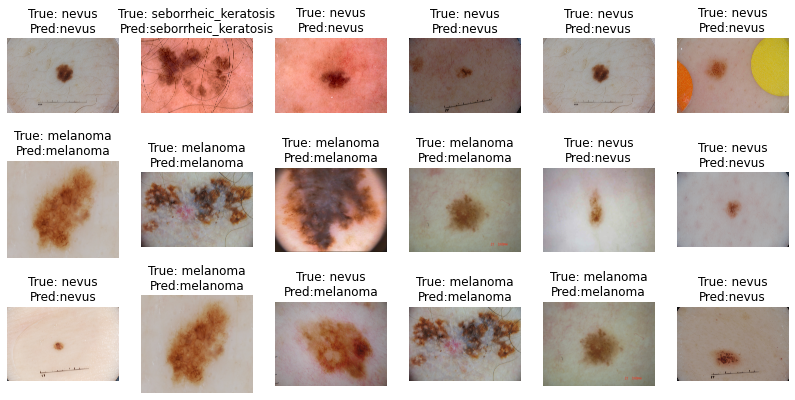

In [ ]:
from matplotlib.colorbar import constrained_layout
fig,axs = plt.subplots(nrows=3, ncols=6, constrained_layout=False, figsize=(14,7))

for ax in axs.flat:
    random_indx = np.random.randint(0, len(test_img_paths))

    img = plt.imread(test_img_paths[random_indx])
    ax.imshow(img)
    label_pred = get_label_from_prediction(new_model, labels, img)
    #label_pred = labels[np.argmax(test_one_hot_pred[random_indx])]
    ax.set_title('True: ' + test_titles[random_indx] + "\n" + 'Pred:' + label_pred)
    ax.axis('off')

# Summary
The model trained on custom data (only 125 images) achieved the accuracy over 80% and can predict well on the test data. 
However, a new image of melanoma found online cannot be predicted correctly. 